## Hasan Mahabub Sayem
### 01832829921

# Feature Engineering With Real-Life Dataset Assignment #11 
Dataset : https://www.kaggle.com/datasets/patrickgendotti/udacity-course-catalog

1. Download and Read data using pandas
2. Handle missing values in 'Level', 'Duration', 'Review Count' and 'rating' columns
3. Apply one-hot encoding for 'Level' column
4. Apply data bining for 'Rating' column
5. Apply boxcox transformer for 'Review Count' column and plot the distribution (before and after transformer)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Read data using pandas
df = pd.read_csv('./data/all_courses.csv')

In [4]:
df.shape

(267, 11)

In [5]:
df.head()

,Title,Type,Description,Level,Duration,Rating,Review Count,Skills Covered,Prerequisites,Affiliates,URL
0,Data Engineering with AWS,nanodegree,"Learn to design data models, build data wareho...",intermediate,4 Months,4.6,1802.0,"AWS Glue, Amazon S3, AWS Data Warehouse, Re...","Intermediate Python, intermediate SQL & comman...",NaN,https://www.udacity.com/course/data-engineer-n...
1,Product Manager,nanodegree,Envision and execute the development of indust...,beginner,4 Months,4.7,864.0,"Product Strategy, Product Design, Product Deve...",No Experience Required,NaN,https://www.udacity.com/course/product-manager...
2,C++,nanodegree,Get hands-on experience building five real-wor...,intermediate,4 Months,4.5,1126.0,"Data Structures & Algorithms, Memory Managemen...",Intermediate Programming,NaN,https://www.udacity.com/course/c-plus-plus-nan...
3,Business Analytics,nanodegree,Gain foundational data skills like analyzing d...,beginner,3 Months,4.8,2649.0,"Excel & Spreadsheets, SQL, Data Visualization,...",None,Mode,https://www.udacity.com/course/business-analyt...
4,Data Scientist,nanodegree,"Build effective machine learning models, run d...",advanced,4 Months,4.7,1212.0,"Machine Learning, Deep Learning, Software Engi...","Python, SQL & Statistics","Bertelsmann, Figure Eight, IBM Watson, Insight...",https://www.udacity.com/course/data-scientist-...


In [6]:
for f in ['Level', 'Duration', 'Review Count', 'Rating' ]:
    print(f'Total no. of null value in {f} is {df[f].isnull().sum()}')
    print(f'Null value percentage in {f} is {(df[f].isnull().sum()/df.shape[0])*100}% \n')

Total no. of null value in Level is 2
Null value percentage in Level is 0.7490636704119851% 

Total no. of null value in Duration is 4
Null value percentage in Duration is 1.4981273408239701% 

Total no. of null value in Review Count is 205
Null value percentage in Review Count is 76.77902621722846% 

Total no. of null value in Rating is 205
Null value percentage in Rating is 76.77902621722846% 



In [7]:
df[df['Level'].isnull()]

,Title,Type,Description,Level,Duration,Rating,Review Count,Skills Covered,Prerequisites,Affiliates,URL
217,Configuring Linux Web Servers,free,NaN,NaN,1 Week,NaN,NaN,"Android Development, Firebase, Analytics",NaN,NaN,https://www.udacity.com/course/configuring-lin...
220,Passwordless Login Solutions for Android,free,NaN,NaN,1 Week,NaN,NaN,"Google Maps APIs, Static Maps, Street View ima...",NaN,Facebook for Developers,https://www.udacity.com/course/passwordless-lo...


In [8]:
df['Level'].unique()

array(['intermediate', 'beginner', 'advanced', nan], dtype=object)

In [9]:
df.groupby('Type')['Level'].agg([pd.Series.mode])

,mode
Type,
course,"[beginner, intermediate]"
free,intermediate
nanodegree,intermediate


Both of the null value have course type free. So we will fillup this null value with most frequent level which is 'intermidiate'.

In [10]:
# fiiling missing value with constant
df['Level'] = df['Level'].fillna('intermediate')

In [11]:
df['Level'].unique()

array(['intermediate', 'beginner', 'advanced'], dtype=object)

we will fill the missing duration value with thier most frequent duration of course

In [12]:
# filling missing value using SimpleImputer
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
df['Duration'] = imputer.fit_transform(df['Duration'].values.reshape(-1, 1))

In [13]:
df['Duration'].isnull().sum()

0

In [14]:
# filling missing value using KNNImputer
from sklearn.impute import KNNImputer
knn_imputer = KNNImputer(n_neighbors=3, weights="uniform")
df[['Review Count','Rating']] = knn_imputer.fit_transform(df[['Review Count','Rating']])

In [15]:
df['Review Count'].isnull().sum(), df['Rating'].isnull().sum()

(0, 0)

In [16]:
for f in ['Level', 'Duration', 'Review Count', 'Rating' ]:
    print(f'Total no. of null value in {f} is {df[f].isnull().sum()}')
    print(f'Null value percentage in {f} is {(df[f].isnull().sum()/df.shape[0])*100}% \n')

Total no. of null value in Level is 0
Null value percentage in Level is 0.0% 

Total no. of null value in Duration is 0
Null value percentage in Duration is 0.0% 

Total no. of null value in Review Count is 0
Null value percentage in Review Count is 0.0% 

Total no. of null value in Rating is 0
Null value percentage in Rating is 0.0% 



Handled all missing value.

In [17]:
#one-hot encoding for 'Level' column
cls = df['Level']
data = pd.DataFrame(cls)

one_hot = pd.get_dummies(cls)
data = data.join(one_hot)
data

,Level,advanced,beginner,intermediate
0,intermediate,0,0,1
1,beginner,0,1,0
2,intermediate,0,0,1
3,beginner,0,1,0
4,advanced,1,0,0
...,...,...,...,...
262,intermediate,0,0,1
263,intermediate,0,0,1
264,intermediate,0,0,1
265,intermediate,0,0,1


In [18]:
# data bining for 'Rating' column

cut_labels = ['Bad', 'Not Bad','Average', 'Good','Very Good','Excellent']
cut_bins = [0, 1, 2, 3, 4, 4.5, 5]

df['Rating'] = pd.cut(df['Rating'], bins=cut_bins, labels=cut_labels)


In [19]:
df.head()

,Title,Type,Description,Level,Duration,Rating,Review Count,Skills Covered,Prerequisites,Affiliates,URL
0,Data Engineering with AWS,nanodegree,"Learn to design data models, build data wareho...",intermediate,4 Months,Excellent,1802.0,"AWS Glue, Amazon S3, AWS Data Warehouse, Re...","Intermediate Python, intermediate SQL & comman...",NaN,https://www.udacity.com/course/data-engineer-n...
1,Product Manager,nanodegree,Envision and execute the development of indust...,beginner,4 Months,Excellent,864.0,"Product Strategy, Product Design, Product Deve...",No Experience Required,NaN,https://www.udacity.com/course/product-manager...
2,C++,nanodegree,Get hands-on experience building five real-wor...,intermediate,4 Months,Very Good,1126.0,"Data Structures & Algorithms, Memory Managemen...",Intermediate Programming,NaN,https://www.udacity.com/course/c-plus-plus-nan...
3,Business Analytics,nanodegree,Gain foundational data skills like analyzing d...,beginner,3 Months,Excellent,2649.0,"Excel & Spreadsheets, SQL, Data Visualization,...",None,Mode,https://www.udacity.com/course/business-analyt...
4,Data Scientist,nanodegree,"Build effective machine learning models, run d...",advanced,4 Months,Excellent,1212.0,"Machine Learning, Deep Learning, Software Engi...","Python, SQL & Statistics","Bertelsmann, Figure Eight, IBM Watson, Insight...",https://www.udacity.com/course/data-scientist-...


lambda : 0.41159999716685663


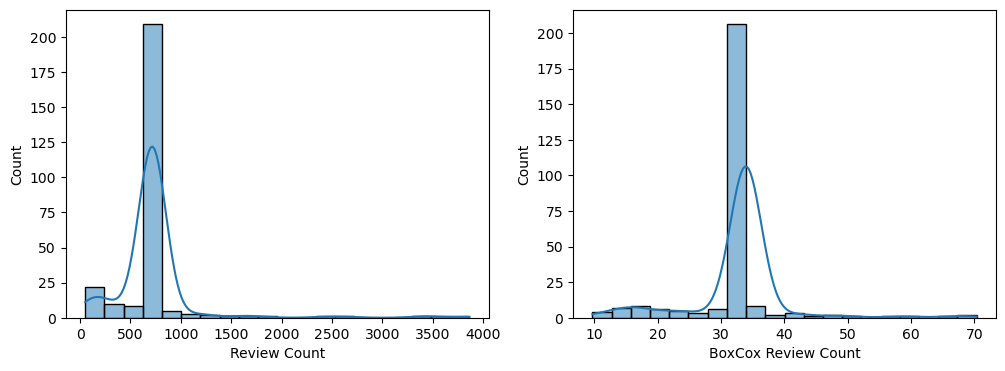

In [146]:
# Apply boxcox transformer for 'Review Count' column and plot the distribution (before and after transformer)
from scipy.stats import boxcox

rc = df['Review Count']
rc, fitted_lambda = boxcox(rc, lmbda=None)
df['BoxCox Review Count'] = rc

print("lambda :",fitted_lambda)

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(12,4))

sns.histplot(x=df['Review Count'], bins=20, ax=ax1, kde=True)
sns.histplot(x=df['BoxCox Review Count'] , bins=20, ax=ax2, kde=True)

plt.show()